In [121]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.0f}'.format
from nltk.corpus import stopwords
import re

In [109]:
data = pd.read_csv('linkedin_job_descriptions.csv')

In [127]:
# Read job keywords from the text file
with open('job keywords.txt', 'r') as file:
    job_keywords = file.read()
    
# Clean job keywords
job_keywords = job_keywords.replace("'", "").split(',')
job_keywords = [f" {keyword.strip().lower()} " for keyword in job_keywords]

In [110]:
data.head()

job_id                         job_title company_name  \
0  3959366208                    Data Scientist      Lingaro   
1  3984651125  AI/Machine Learning Intern- Paid   BreakoutAI   
2  3975347333                    Data Scientist         KPMG   
3  3916205376                    AI/ML Engineer      Siemens   
4  3983495628            Data Scientist - India      Netflix   

                 job_location          date_posted       num_applicants  \
0                       India          4 weeks ago  Over 100 applicants   
1                       India        2 minutes ago         0 applicants   
2  Mumbai, Maharashtra, India           1 week ago  Over 100 applicants   
3    Pune, Maharashtra, India  Reposted 1 week ago  Over 100 applicants   
4  Mumbai Metropolitan Region            1 day ago  Over 100 applicants   

                                            insights  \
0  ['Remote\nMatches your job preferences, workpl...   
1  ['Remote\nMatches your job preferences, workpl...   
2  ['Hybrid\nMatches your job preferences, workpl...   
3  ['Hybrid\nMatches your job preferences, workpl...   
4  ['On-site\nMatches your job preferences, workp...   

                                            job_link  \
0  https://www.linkedin.com/jobs/view/3959366208/...   
1  https://www.linkedin.com/jobs/view/3984651125/...   
2  https://www.linkedin.com/jobs/view/3975347333/...   
3  https://www.linkedin.com/jobs/view/3916205376/...   
4  https://www.linkedin.com/jobs/view/3983495628/...   

                                     job_description  
0  About the job\nData Scientist – Associate/Lead...  
1  About the job\nJob Description: As a Machine L...  
2  About the job\nAs a Data Scientist you will be...  
3  About the job\nHello Visionary! \n\nWe empower...  
4  About the job\nNetflix is one of the world’s l...

In [111]:
data.shape

(7526, 9)

In [112]:
data['job_id'].duplicated().sum()

0

In [113]:
data.describe(include=[object])

job_title company_name                 job_location  \
count               7526         6773                         7151   
unique              3502         2218                          191   
top     Business Analyst       Turing  Bengaluru, Karnataka, India   
freq                 512         1171                         1216   

       date_posted       num_applicants  \
count         7271                 7157   
unique         121                  102   
top     1 week ago  Over 100 applicants   
freq          1300                 2315   

                                                 insights  \
count                                                7300   
unique                                               5584   
top     ['Remote\nMatches your job preferences, workpl...   
freq                                                  230   

                                                 job_link job_description  
count                                                7526            7526  
unique                                               7526            5643  
top     https://www.linkedin.com/jobs/view/3959366208/...   About the job  
freq                                                    1              84

In [114]:
data['job_title'] = data['job_title'].str.lower()

In [115]:
data['job_title'].value_counts().head(10)

business analyst                     516
data engineer                        340
python developer                     224
remote python developer              157
data scientist                       121
remote python programmer             115
data analyst                         114
analyst                              100
remote python solutions developer     90
math research analyst                 86
Name: job_title, dtype: int64

In [116]:
data['job_title'].unique().tolist()

['data scientist',
 'ai/machine learning intern- paid',
 'ai/ml engineer',
 'data scientist - india',
 'data scientist (ai/ml)',
 'nlp data scientist',
 'ai/ml architect',
 'ai engineer',
 'ai / ml engineer',
 'prompt engineer',
 'deep learning engineer -(dnn, ann)',
 'machine learning engineer',
 'ai/ml',
 'ml architect',
 'data scientist, python ai/ml (join within 1-3 week )',
 'ai/ml engineer (openai/gemini/large language models)',
 'ml research scientist',
 'ai product researcher/ ml product engineer',
 'data analyst',
 'ai engineer (remote)',
 'junior data scientist',
 'data modeler',
 'associate',
 'data scientist | 2 to 4 years|',
 'information analyst',
 'ml engineer',
 'remote data scientist - python',
 'associate data scientist',
 'artificial intelligence engineer',
 'data scientist + llm',
 'ml generative ai',
 'data / ml engineer-4',
 'generative ai engineer',
 'computer vision and machine learning researcher',
 'data scientist – predictive machine learning',
 'data scienti

In [ ]:
# Define a mapping function
def map_job_title(job_title):
    
    if 'data scientist' in job_title or 'data science' in job_title :
        return 'Data Scientist'
    elif 'prompt ' in job_title :
        return 'Prompt Engineer'
    elif 'llm' in job_title:
        return 'LLM Engineer'
    elif 'data engineer' in job_title or ' etl ' in job_title  or 'sql developer' in job_title or 'database' in job_title:
        return 'Data Engineer'
    elif 'data analyst' in job_title   :
        return 'Data Analyst'
    elif 'business analyst' in job_title or 'business intelligence' in job_title or 'business intelligence analyst' in job_title  or ' bi ' in job_title:
        return 'Business Analyst'
    elif 'machine learning' in job_title  or 'ai' in job_title  or 'artificial intelligence' in job_title   or 'ml' in job_title:
        return 'Machine Learning Engineer'
    elif 'software developer' in job_title  or 'python' in job_title  or 'software engineer' in job_title:
        return 'Software Developer'
    elif 'research analyst' in job_title  or 'research scientist' in job_title  or 'vulnerability researcher' in job_title :
        return 'Research Analyst'
    elif 'consultant' in job_title :
        return 'Technical Consultant'
    else:
        return 'Other'

# Apply the mapping function
data['job_category'] = data['job_title'].apply(map_job_title)

In [148]:
# Display the first few rows with the new job_category column
data[['job_title', 'job_category']].sample(10)

job_title          job_category
6250                                   business analyst      Business Analyst
7117                                lead data scientist        Data Scientist
4017                  remote python solutions developer    Software Developer
6607               business analyst internship in noida      Business Analyst
431                                    research analyst      Research Analyst
5408          ax technical consultant - x++ programming  Technical Consultant
1511  fraud risk analytics and data reporting - asso...                 Other
195            applied scientist ii, content experience                 Other
7417  data engineer with python ,bigdata & aws-gunja...         Data Engineer
438                                   scientist 1 - adl                 Other

In [149]:
data[['job_title', 'job_category']][data['job_category']=='Other'].sample(10)

job_title job_category
1322                                specialist        Other
1514                                   analyst        Other
846   sr. research associate ii - invivo, dmpk        Other
627              research fellow (109502-0724)        Other
399                 scientist i human genomics        Other
1023               data integration specialist        Other
7512                        analytics engineer        Other
2097         quant modeling analyst, bangalore        Other
5637      credit risk analytics analyst ii-c10        Other
1003               threat intelligence analyst        Other

In [134]:
data['job_category'].value_counts()

Other                        1621
Data Engineer                 974
Technical Consultant          974
Software Developer            898
Business Analyst              898
Data Scientist                751
Machine Learning Engineer     497
Research Analyst              456
Data Analyst                  419
LLM Engineer                   21
Prompt Engineer                17
Name: job_category, dtype: int64

In [176]:
# Preprocess the job descriptions
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


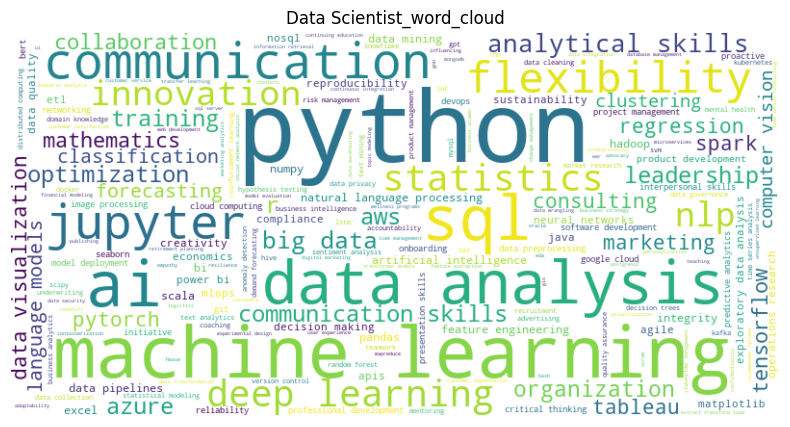

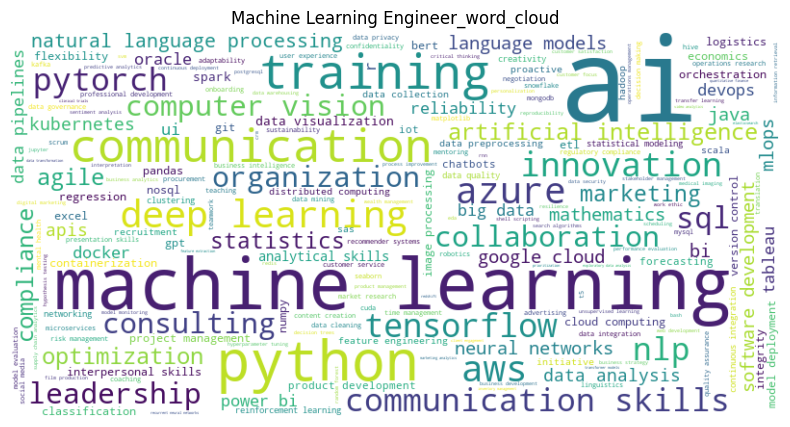

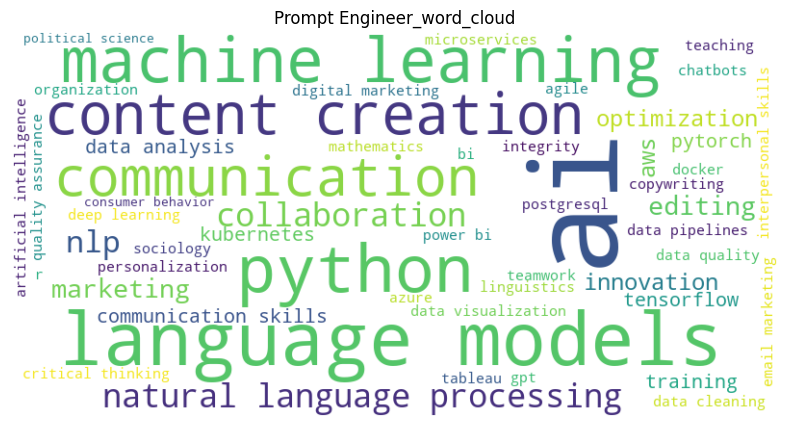

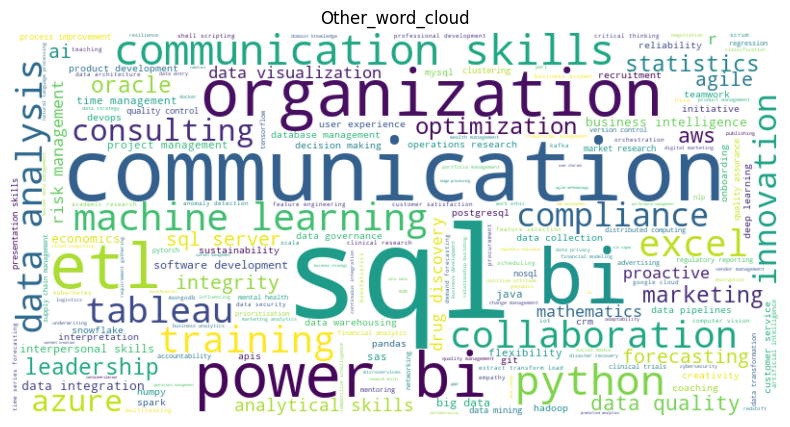

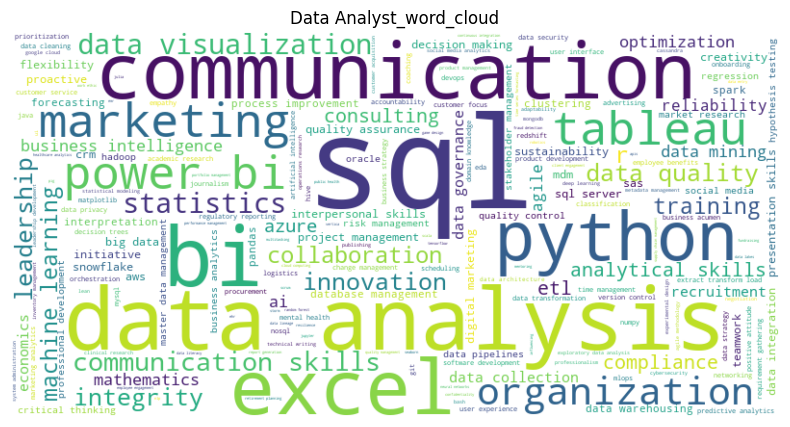

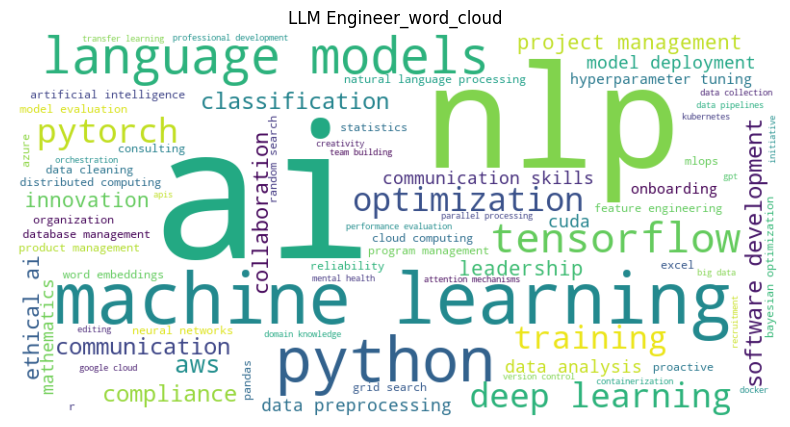

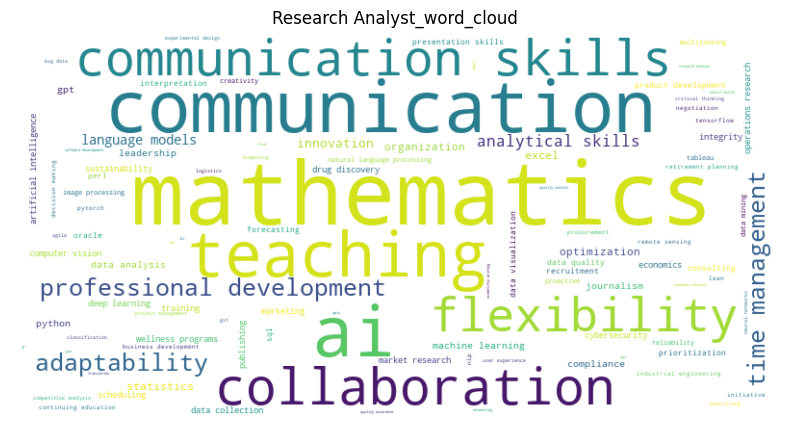

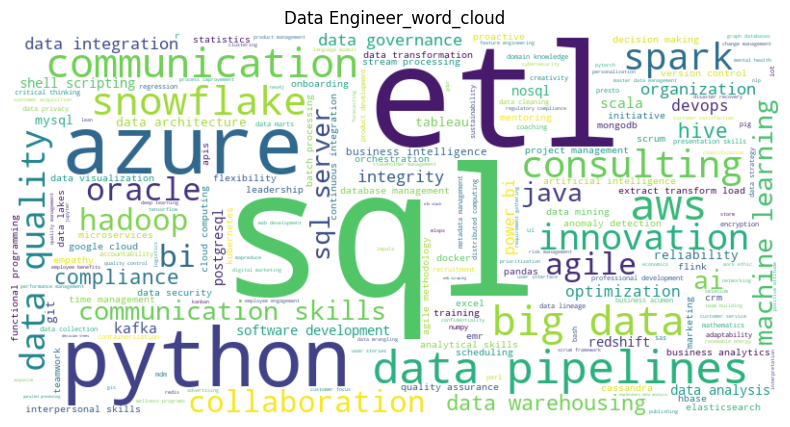

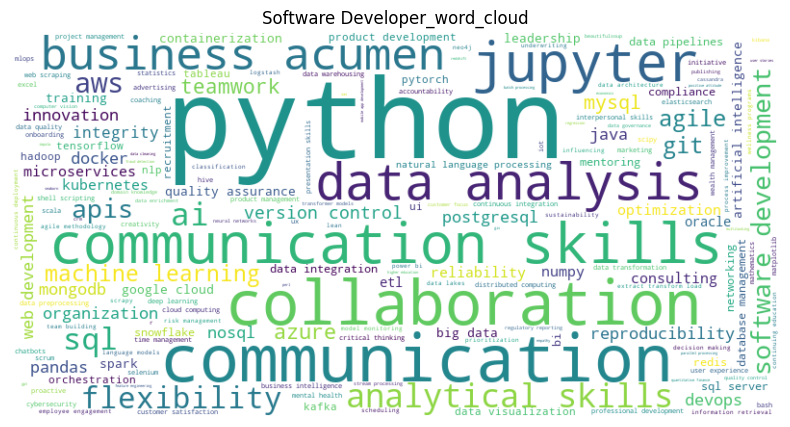

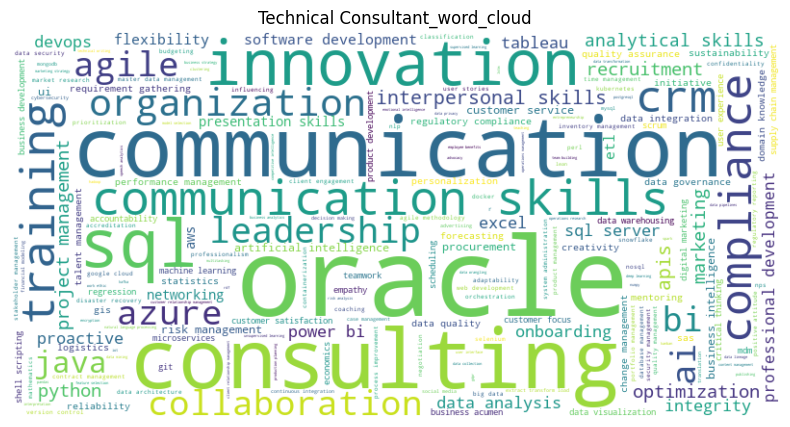

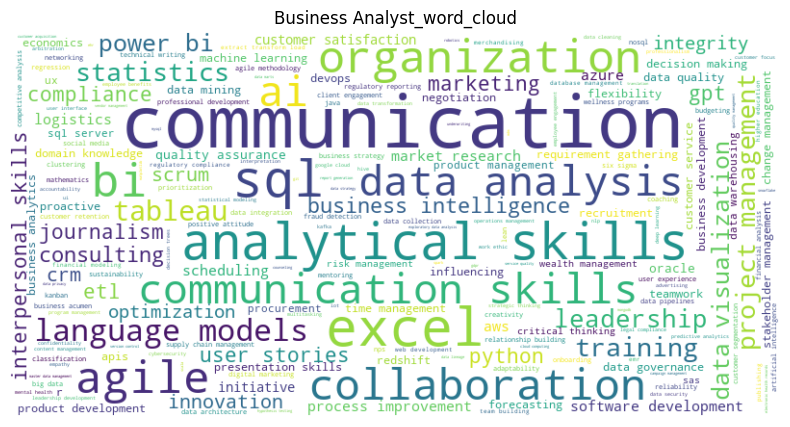

In [136]:
job_categories = data['job_category'].unique().tolist()
for job_category in job_categories:
    text_data = data[data['job_category']==job_category]['job_description'].tolist()

    preprocessed_text_data = [preprocess_text(desc) for desc in text_data]

    combined_text = ' '.join(preprocessed_text_data)

    keyword_freq = Counter()
    for keyword in job_keywords:
        keyword_freq[keyword] = combined_text.count(keyword)

    # Print keyword frequencies to check the content
    # print("Keyword Frequencies:", keyword_freq)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{job_category}_word_cloud')
    plt.show()

In [185]:
text_data = input('copy past text in your resume here\n')

copy past text in your resume here
CAREER OBJECTIVE: Passionate Data Analyst with 4 years of experience in the Defence Industry as a Radar Engineer. Proficient in SQL, Python, and Excel, Skilled in data analytics, visualization, and problem-solving. Seeking opportunities to apply advanced data science techniques to drive insights and deliver value. PROFESSIONAL SUMMARY: • Experience working with Machine learning algorithms like Linear Regression, Logistic Regression, SVM, kNN, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, K means. • Hyperparameter tuning of models and Dimensionality Reduction like PCA, LDA. • Performing Exploratory Data Analysis (EDA) and ETL process from various sources. • Feature Engineering in Python – missing value treatment, outlier handling, data transformation, • Feature Selection and reshaping data using Python Packages like Numpy, Pandas and Scikit Learn. • Data Visualization techniques with the help of Matplotlib, Seaborn and Tableau. • Skilled i

In [186]:
# text_data = data[data['job_category']==job_category]['job_description'].tolist()

In [187]:
preprocessed_text_data = preprocess_text(text_data)

# combined_text = ' '.join(preprocessed_text_data)

In [188]:
preprocessed_text_data

'career objective passionate data analyst 4 years experience defence industry radar engineer proficient sql python excel skilled data analytics visualization problemsolving seeking opportunities apply advanced data science techniques drive insights deliver value professional summary experience working machine learning algorithms like linear regression logistic regression svm knn decision tree random forest adaboost gradient boosting k means hyperparameter tuning models dimensionality reduction like pca lda performing exploratory data analysis eda etl process various sources feature engineering python missing value treatment outlier handling data transformation feature selection reshaping data using python packages like numpy pandas scikit learn data visualization techniques help matplotlib seaborn tableau skilled libraries like numpy pandas matplotlib seaborn scikit learn hands experience working datasets data extraction preprocessing modelselection model building avoiding overfitting 

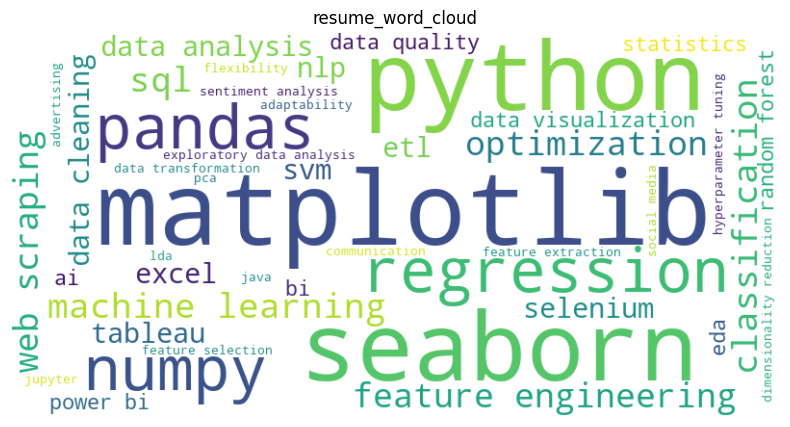

In [190]:
keyword_freq = Counter()
for keyword in job_keywords:
    keyword_freq[keyword] = preprocessed_text_data.count(keyword)

# Print keyword frequencies to check the content
# print("Keyword Frequencies:", keyword_freq)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Resume_word_cloud')
plt.show()

In [193]:
keyword_freq = pd.DataFrame(keyword_freq)

ValueError: If using all scalar values, you must pass an index